# Deep Dive Exploratory Data Analysis

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import pandas as pd
import matplotlib.pyplot as plt

# Debugging Imports
import src
print(f"SRC PKG: {src.__file__}")
import src.utils
print(f"UTILS FILE: {src.utils.__file__}")

from src.config import FILTERED_CSV, IMAGES_DIR
from src.utils import save_plot, generate_wordcloud

pd.set_option('display.max_colwidth', 100)
df = pd.read_csv(FILTERED_CSV, low_memory=False)

SRC PKG: c:\Users\hp\Downloads\KAIM\KAIM_WEEK7\RAG-Complaint-Intelligence-Platform\src\__init__.py
UTILS FILE: c:\Users\hp\Downloads\KAIM\KAIM_WEEK7\RAG-Complaint-Intelligence-Platform\src\utils.py


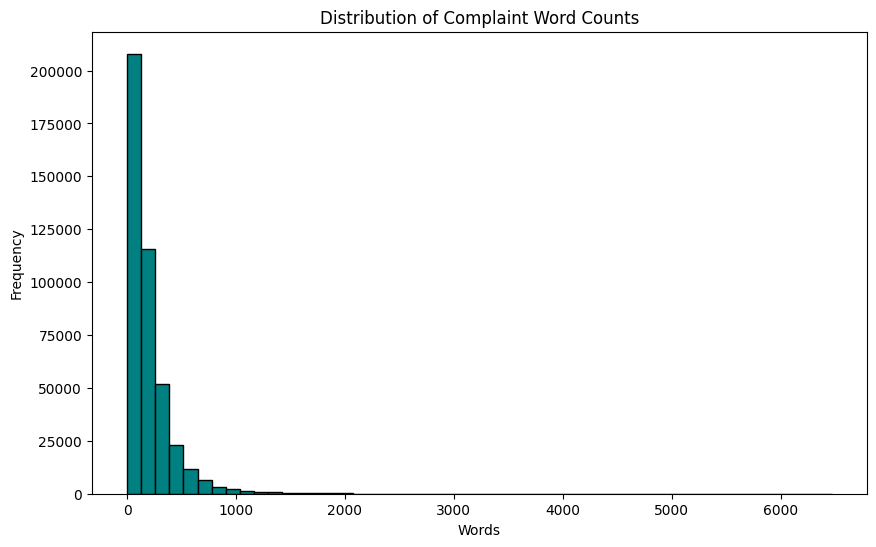

In [3]:
# Viz 1: Histogram of Complaint Word Counts
df['word_count'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['word_count'], bins=50, color='teal', edgecolor='black')
ax.set_title('Distribution of Complaint Word Counts')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
plt.show()

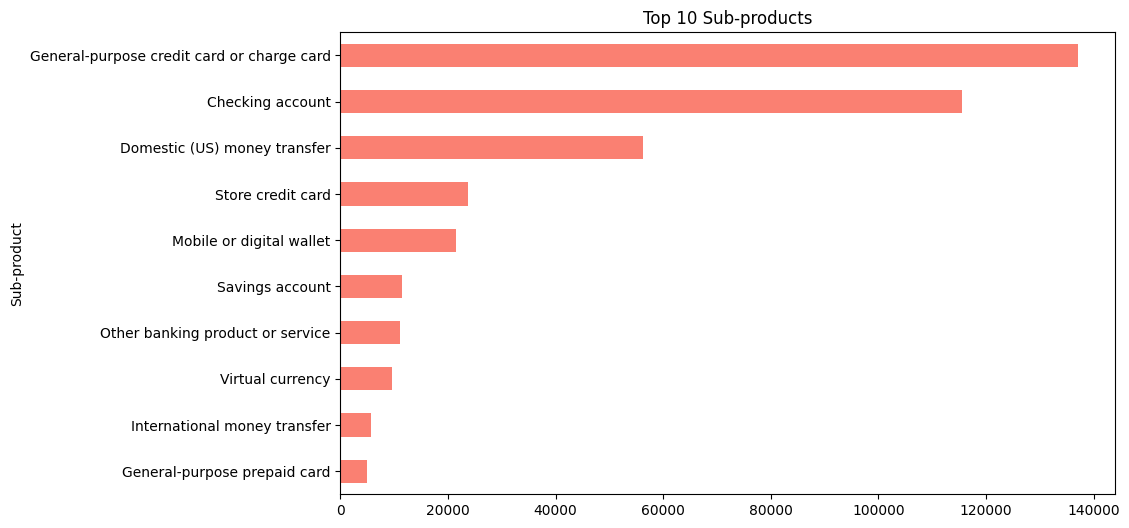

In [4]:
# Viz 2: Top 10 Sub-products
top_sub = df['Sub-product'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(10, 6))
top_sub.sort_values().plot(kind='barh', color='salmon', ax=ax)
ax.set_title('Top 10 Sub-products')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16608\4093059740.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_trend = df.set_index('Date received').resample('M').size()


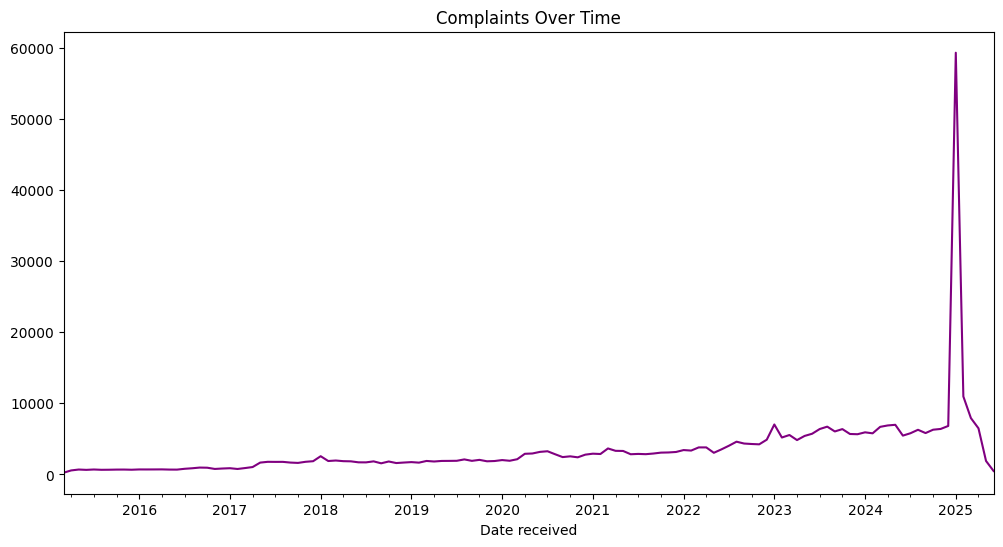

In [5]:
# Viz 3: Information regarding time trend is dependent on 'Date received'
if 'Date received' in df.columns:
    df['Date received'] = pd.to_datetime(df['Date received'])
    time_trend = df.set_index('Date received').resample('M').size()
    fig, ax = plt.subplots(figsize=(12, 6))
    time_trend.plot(ax=ax, color='purple')
    ax.set_title('Complaints Over Time')
    plt.show()

Saved plot to c:\Users\hp\Downloads\KAIM\KAIM_WEEK7\RAG-Complaint-Intelligence-Platform\images\wordcloud.png


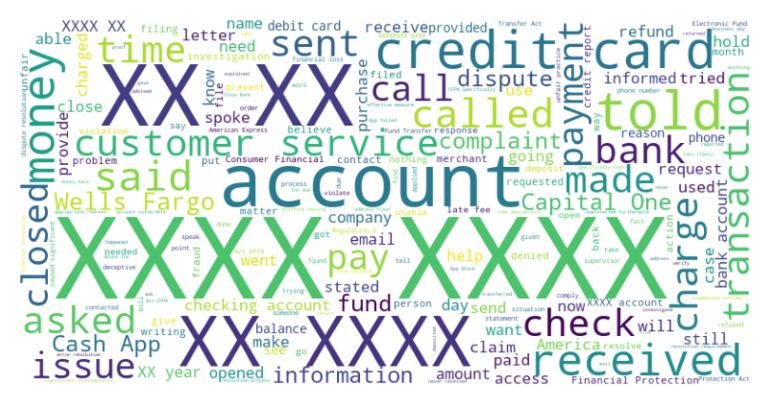

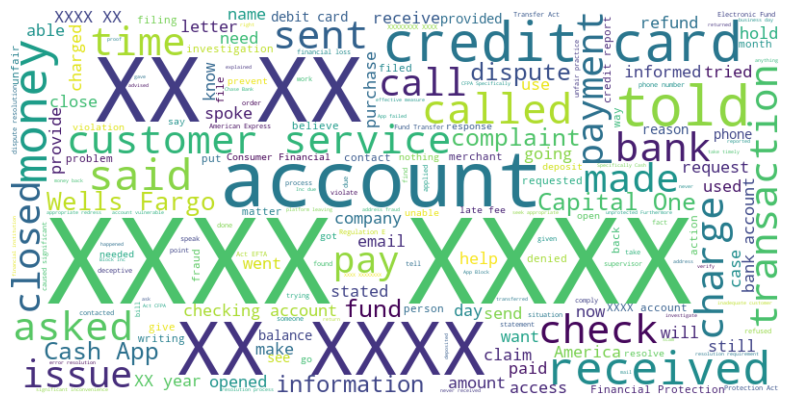

In [6]:
# Viz 4: WordCloud
from IPython.display import Image
generate_wordcloud(df['Consumer complaint narrative'].astype(str).tolist(), 'wordcloud.png')
Image(filename='../images/wordcloud.png')